In [1]:
import pandas as pd
import matplotlib.pyplot as plt   

In [2]:
# Load Apple stock data
stock_df = pd.read_csv("../data/yfinance_data/AAPL.csv", parse_dates=['Date'])

# Preview the data
stock_df.head()

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [3]:
# Sort data by date
stock_df = stock_df.sort_values('Date')

# Check for missing values
stock_df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [4]:
# 10-day Moving Average
stock_df['MA10'] = stock_df['Close'].rolling(window=10).mean()

# 50-day Moving Average
stock_df['MA50'] = stock_df['Close'].rolling(window=50).mean()

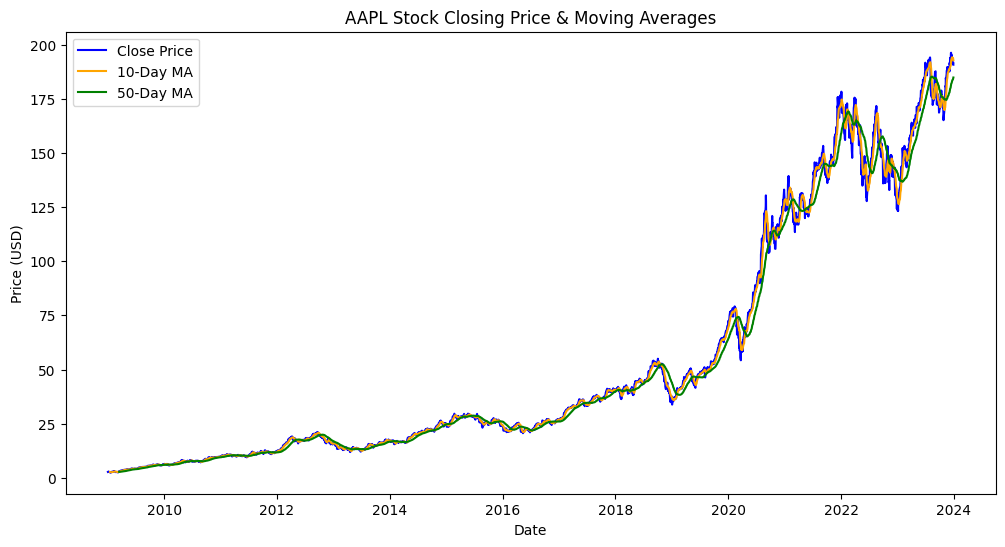

In [5]:
plt.figure(figsize=(12,6))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price', color='blue')
plt.plot(stock_df['Date'], stock_df['MA10'], label='10-Day MA', color='orange')
plt.plot(stock_df['Date'], stock_df['MA50'], label='50-Day MA', color='green')
plt.title("AAPL Stock Closing Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [6]:
# Calculate daily returns
stock_df['Daily_Return'] = stock_df['Close'].pct_change()

# Preview
stock_df[['Date','Close','Daily_Return']].head()

,Date,Close,Daily_Return
0,2009-01-02,2.721686,NaN
1,2009-01-05,2.836553,0.042204
2,2009-01-06,2.789767,-0.016494
3,2009-01-07,2.729484,-0.021609
4,2009-01-08,2.780169,0.018570
